In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import os
import pandas as pd
import scipy

plt.close('all')

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)
plt.close('all')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/Users/nicholasbachand/Documents/Research/Cascade/city_block_cfd'

'/Users/nicholasbachand/Documents/Research/InteriorModeling'

In [10]:
# resultsTime = "20240311-111046"
resultsTimes = ["20240406-224437", "20240406-234343", "20240406-235655"]
outputs = []
inputs = []
for resultsTime in resultsTimes:
    outputs.append(pd.read_csv(f'{home_dir}/resultsMC/outputs_{resultsTime}.csv', header=[0, 1], index_col=0))
    inputs.append(pd.read_csv(f'{home_dir}/resultsMC/inputs_{resultsTime}.csv', index_col=0))
outputs = pd.concat(outputs, axis = "index", ignore_index=True)
inputs = pd.concat(inputs, axis = "index", ignore_index=True)
display(inputs, outputs)


floorTempAdjustment  hInterior  hExterior  alphaRoof material_type  \
0              -4.151563   2.001253  11.217357   0.843408        Medium   
1              -4.966065   1.934251   4.409396   0.773652        Medium   
2              -3.728921   1.542551   9.089012   0.790930         Heavy   
3              -3.820419   1.088520   2.736810   0.791874        Medium   
4              -3.568809   2.520289   7.330294   0.676811         Light   
..                   ...        ...        ...        ...           ...   
295            -4.052838   1.860244   6.880376   0.831550        Medium   
296            -3.854144   2.520817  12.478498   0.643323         Heavy   
297            -4.722426   1.119643  13.752939   0.802078         Light   
298            -3.915211   1.960244  10.621074   0.886382         Light   
299            -4.228686   1.270526   2.422228   0.622583         Heavy   

     windSpeed  wallRoughness  
0     3.322042       1.864905  
1     1.496870       1.231800  
2     3.264173       1.501094  
3     0.129056       1.120528  
4     2.765833       1.340566  
..         ...            ...  
295   1.871200       1.832894  
296   3.885517       1.851877  
297   5.822008       1.465024  
298   3.767571       1.597425  
299   0.434149       1.643932  

[300 rows x 7 columns]

day_0                                                          \
         hVent dVent ceilingMinusFloor outMinusFloor intWallMinusFloor   
0    58.336111   2.0          1.160281      0.750155          0.640894   
1    10.744444   0.0          1.186441      0.782328          0.820390   
2    59.334722   2.0          1.738984      0.552814          0.136090   
3     9.855556   0.0          1.660120      0.649519          0.634497   
4     7.565278   0.0          2.826216      1.145373          0.669306   
..         ...   ...               ...           ...               ...   
295   9.916667   0.0          1.336466      0.746796          0.698319   
296  11.044444   0.0          1.348329      0.410527         -0.035597   
297   8.198611   0.0          2.906424      1.483766          0.966740   
298   9.047222   0.0          2.735276      1.589841          1.143741   
299  10.959722   0.0          2.148487      0.560175         -0.043953   

                           day_1                                        ...  \
    extWallMinusFloor      hVent dVent ceilingMinusFloor outMinusFloor  ...   
0            1.172592  82.713889   3.0          0.927360      0.617597  ...   
1            1.002430  34.413889   1.0          1.204454      0.733993  ...   
2            0.542073  81.416667   3.0          2.130345      0.592987  ...   
3            0.358288  34.920833   1.0          1.307833      0.710590  ...   
4            1.444444  32.880556   1.0          2.599110      1.211600  ...   
..                ...        ...   ...               ...           ...  ...   
295          0.930743  34.451389   1.0          1.023402      0.596503  ...   
296          0.548604  35.373611   1.0          1.388910      0.469166  ...   
297          2.289009  31.993056   1.0          2.529750      1.133569  ...   
298          2.526797  33.262500   1.0          2.679457      1.568380  ...   
299          0.451494  35.101389   1.0          2.259974      0.649145  ...   

                day_5                                                    \
    ceilingMinusFloor outMinusFloor intWallMinusFloor extWallMinusFloor   
0                 NaN           NaN               NaN               NaN   
1            1.623880      0.635857          0.563209          0.466449   
2                 NaN           NaN               NaN               NaN   
3            1.881129      0.758122          0.770780          0.437686   
4            2.623338      1.526162          1.219369          2.221519   
..                ...           ...               ...               ...   
295          1.249741      0.549990          0.510274          0.484970   
296          1.466220      0.369478          0.051696          0.179743   
297          2.436853      1.575203          1.102969          2.700187   
298          2.517679      1.369386          0.947504          2.090552   
299          2.508891      0.652574          0.192221          0.264483   

          day_6                                                          \
          hVent dVent ceilingMinusFloor outMinusFloor intWallMinusFloor   
0           NaN   NaN               NaN           NaN               NaN   
1    153.052778   6.0          1.519816      0.556919          0.534906   
2           NaN   NaN               NaN           NaN               NaN   
3    154.518056   6.0          1.287223      0.675985          0.741575   
4    153.058333   6.0          2.839572      1.535099          1.083406   
..          ...   ...               ...           ...               ...   
295  153.790278   6.0          1.216692      0.556952          0.514163   
296  154.119444   6.0          1.450266      0.360045          0.017117   
297  154.051389   6.0          2.503094      1.715744          1.381459   
298  153.815278   6.0          2.120854      1.286822          1.040321   
299  153.706944   6.0          2.455868      0.637719          0.187719   

                       
    extWallMinusFloor  
0                 

In [11]:
outputs.columns.get_level_values(0).unique().values

array(['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],
      dtype=object)

In [12]:
dfFull = pd.DataFrame()
days = outputs.columns.get_level_values(0).unique().values
for day in days:
    df = pd.concat([inputs, outputs[day][["ceilingMinusFloor", "outMinusFloor", "intWallMinusFloor", "extWallMinusFloor"]]], axis=1)
    df["day"] = int(day[4:])
    dfFull = pd.concat([dfFull, df], axis = "index")

dfFull = dfFull.dropna()
dfFull = dfFull.reset_index(drop=True)
dfFull

floorTempAdjustment  hInterior  hExterior  alphaRoof material_type  \
0               -4.151563   2.001253  11.217357   0.843408        Medium   
1               -4.966065   1.934251   4.409396   0.773652        Medium   
2               -3.728921   1.542551   9.089012   0.790930         Heavy   
3               -3.820419   1.088520   2.736810   0.791874        Medium   
4               -3.568809   2.520289   7.330294   0.676811         Light   
...                   ...        ...        ...        ...           ...   
1645            -4.052838   1.860244   6.880376   0.831550        Medium   
1646            -3.854144   2.520817  12.478498   0.643323         Heavy   
1647            -4.722426   1.119643  13.752939   0.802078         Light   
1648            -3.915211   1.960244  10.621074   0.886382         Light   
1649            -4.228686   1.270526   2.422228   0.622583         Heavy   

      windSpeed  wallRoughness  ceilingMinusFloor  outMinusFloor  \
0      3.322042       1.864905           1.160281       0.750155   
1      1.496870       1.231800           1.186441       0.782328   
2      3.264173       1.501094           1.738984       0.552814   
3      0.129056       1.120528           1.660120       0.649519   
4      2.765833       1.340566           2.826216       1.145373   
...         ...            ...                ...            ...   
1645   1.871200       1.832894           1.216692       0.556952   
1646   3.885517       1.851877           1.450266       0.360045   
1647   5.822008       1.465024           2.503094       1.715744   
1648   3.767571       1.597425           2.120854       1.286822   
1649   0.434149       1.643932           2.455868       0.637719   

      intWallMinusFloor  extWallMinusFloor  day  
0              0.640894           1.172592    0  
1              0.820390           1.002430    0  
2              0.136090           0.542073    0  
3              0.634497           0.358288    0  
4              0.669306           1.444444    0  
...                 ...                ...  ...  
1645           0.514163           0.546235    6  
1646           0.017117           0.214037    6  
1647           1.381459           2.717896    6  
1648           1.040321           1.932889    6  
1649           0.187719           0.256523    6  

[1650 rows x 12 columns]

In [13]:
dropCondition = dfFull["ceilingMinusFloor"] > 10
dfFull = dfFull[~dropCondition]

In [14]:
def ventRi(delT, V, H = 3):
    g = 10
    Tref = 288.15
    return g * delT / Tref * H / V**2

dfFull.loc[:, "Ri"] = ventRi(dfFull["ceilingMinusFloor"], dfFull["windSpeed"])
dfFull.loc[:, "logRi"] = np.log(dfFull["Ri"])
dfFull

/opt/homebrew/Caskroom/miniconda/base/envs/pycascade/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



floorTempAdjustment  hInterior  hExterior  alphaRoof material_type  \
0               -4.151563   2.001253  11.217357   0.843408        Medium   
1               -4.966065   1.934251   4.409396   0.773652        Medium   
2               -3.728921   1.542551   9.089012   0.790930         Heavy   
3               -3.820419   1.088520   2.736810   0.791874        Medium   
4               -3.568809   2.520289   7.330294   0.676811         Light   
...                   ...        ...        ...        ...           ...   
1645            -4.052838   1.860244   6.880376   0.831550        Medium   
1646            -3.854144   2.520817  12.478498   0.643323         Heavy   
1647            -4.722426   1.119643  13.752939   0.802078         Light   
1648            -3.915211   1.960244  10.621074   0.886382         Light   
1649            -4.228686   1.270526   2.422228   0.622583         Heavy   

      windSpeed  wallRoughness  ceilingMinusFloor  outMinusFloor  \
0      3.322042       1.864905           1.160281       0.750155   
1      1.496870       1.231800           1.186441       0.782328   
2      3.264173       1.501094           1.738984       0.552814   
3      0.129056       1.120528           1.660120       0.649519   
4      2.765833       1.340566           2.826216       1.145373   
...         ...            ...                ...            ...   
1645   1.871200       1.832894           1.216692       0.556952   
1646   3.885517       1.851877           1.450266       0.360045   
1647   5.822008       1.465024           2.503094       1.715744   
1648   3.767571       1.597425           2.120854       1.286822   
1649   0.434149       1.643932           2.455868       0.637719   

      intWallMinusFloor  extWallMinusFloor  day         Ri     logRi  
0              0.640894           1.172592    0   0.010946 -4.514781  
1              0.820390           1.002430    0   0.055129 -2.898078  
2              0.136090           0.542073    0   0.016992 -4.074995  
3              0.634497           0.358288    0  10.377265  2.339617  
4              0.669306           1.444444    0   0.038464 -3.258029  
...                 ...                ...  ...        ...       ...  
1645           0.514163           0.546235    6   0.036178 -3.319309  
1646           0.017117           0.214037    6   0.010001 -4.605049  
1647           1.381459           2.717896    6   0.007688 -4.868047  
1648           1.040321           1.932889    6   0.015556 -4.163326  
1649           0.187719           0.256523    6   1.356532  0.304931  

[1650 rows x 14 columns]

In [15]:
qois = ["outMinusFloor", "ceilingMinusFloor", "extWallMinusFloor", "intWallMinusFloor"]
fig = px.histogram(
    dfFull,
    x = qois,
    marginal="box", # or violin, rug
    barmode = "group"
    )
fig.show()

fig = px.line(dfFull, y = qois)
fig.show()


In [16]:
facet_col_order = ['Light', 'Medium', 'Heavy']
fig = px.scatter(dfFull, x="floorTempAdjustment", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="hInterior", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="alphaRoof", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="day", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="windSpeed", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="wallRoughness", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="hExterior", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()
fig = px.scatter(dfFull, x="logRi", y=qois, facet_col="material_type", trendline="ols", category_orders={'material_type': facet_col_order})
fig.show()

In [17]:
fig = px.scatter(dfFull, x="windSpeed", y="logRi", symbol="material_type")
fig.show()
fig = px.scatter(dfFull.loc[dfFull["windSpeed"] >= 2], x="windSpeed", y="Ri", symbol="material_type")
fig.show()

In [18]:
fig = px.scatter_3d(dfFull, x="outMinusFloor", y="ceilingMinusFloor", z="extWallMinusFloor", color="intWallMinusFloor", symbol="material_type", size = "windSpeed")
fig.show()

# fig = px.scatter(dfFull, x="outMinusFloor", y="ceilingMinusFloor", color="intWallMinusFloor", symbol="material_type",  size = "windSpeed")
# fig.show()
# fig = px.scatter(dfFull, x="outMinusFloor", y="extWallMinusFloor", color="intWallMinusFloor", symbol="material_type",  size = "windSpeed")
# fig.show()
# fig = px.scatter(dfFull, x="ceilingMinusFloor", y="extWallMinusFloor", color="intWallMinusFloor", symbol="material_type",  size = "windSpeed")
# fig.show()

array([121.53156545,  22.1199305 ,   7.75079641,   6.58706143])

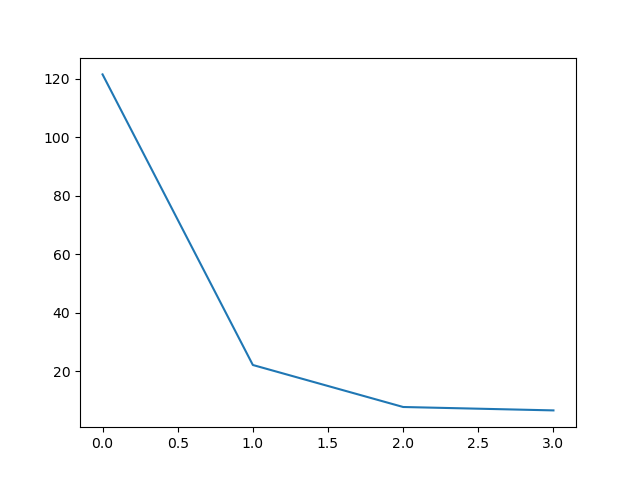

In [19]:
plt.figure()
qoiX = dfFull[qois]
U, S, V = np.linalg.svd(qoiX)
plt.plot(S)
display(S)

In [20]:
qoiX @ V[0:2,:].T

0         1
0    -1.898695  0.289840
1    -1.883887  0.221907
2    -1.772725 -0.697782
3    -1.780764 -0.595269
4    -3.388659 -0.591835
...        ...       ...
1645 -1.499582 -0.224330
1646 -1.288914 -0.781979
1647 -4.232678  0.762580
1648 -3.293133  0.339625
1649 -2.176724 -1.339760

[1650 rows x 2 columns]

In [21]:
dfFull['windSpeed']

0       3.322042
1       1.496870
2       3.264173
3       0.129056
4       2.765833
          ...   
1645    1.871200
1646    3.885517
1647    5.822008
1648    3.767571
1649    0.434149
Name: windSpeed, Length: 1650, dtype: float64

In [22]:
fig = px.scatter_3d(qoiX @ V.T, x=0, y=1, z=2, color=3)
fig.show()

fig = px.scatter(qoiX @ V[0:2,:].T, x=0, y=1, color=dfFull["windSpeed"], symbol=dfFull["material_type"])
fig.show()

fig = px.scatter(qoiX @ V[2:,:].T, x=0, y=1, color=dfFull["windSpeed"], symbol=dfFull["material_type"])
fig.show()

In [23]:
qoiX

outMinusFloor  ceilingMinusFloor  extWallMinusFloor  intWallMinusFloor
0          0.750155           1.160281           1.172592           0.640894
1          0.782328           1.186441           1.002430           0.820390
2          0.552814           1.738984           0.542073           0.136090
3          0.649519           1.660120           0.358288           0.634497
4          1.145373           2.826216           1.444444           0.669306
...             ...                ...                ...                ...
1645       0.556952           1.216692           0.546235           0.514163
1646       0.360045           1.450266           0.214037           0.017117
1647       1.715744           2.503094           2.717896           1.381459
1648       1.286822           2.120854           1.932889           1.040321
1649       0.637719           2.455868           0.256523           0.187719

[1650 rows x 4 columns]

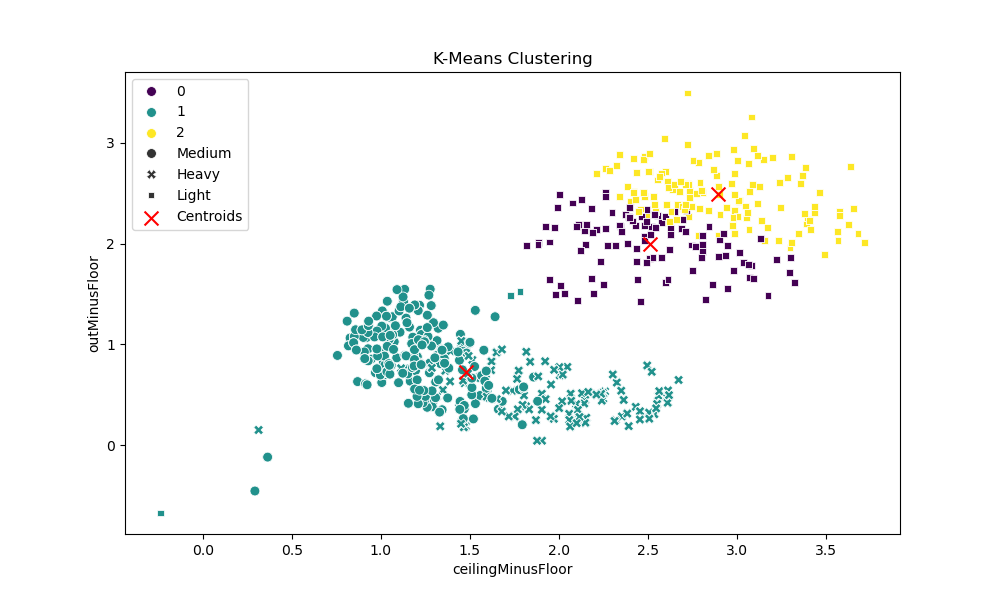

In [24]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming X contains your 4-dimensional data
# X = [[feature1_1, feature2_1, feature3_1, feature4_1],
#      [feature1_2, feature2_2, feature3_2, feature4_2],
#      ...
#      [feature1_n, feature2_n, feature3_n, feature4_n]]

# Step 2: Choose the number of clusters (k)
k = 3

# Step 3: Apply K-Means Algorithm
kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')

# Step 4: Fit the model
kmeans.fit(qoiX)

# Step 5: Cluster Assignment
labels = kmeans.labels_

# Step 6: Interpret Results
centroids = kmeans.cluster_centers_

# Analyze the clusters and visualize the results as needed


# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plot data points
sns.scatterplot(data=qoiX, x='ceilingMinusFloor', y='extWallMinusFloor', hue=labels, style=dfFull["material_type"], palette='viridis', legend='full', s=50)

# Plot centroids
plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, c='red', label='Centroids')

plt.xlabel('ceilingMinusFloor')
plt.ylabel('outMinusFloor')
plt.title('K-Means Clustering')

plt.legend()
plt.show()
